In [11]:
# Library

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
# Load Travel Time Data

In [2]:
# df1 = pd.read_csv('episode_travel_times_1.csv', index_col = 0)
# df2 = pd.read_csv('episode_travel_times_2.csv', index_col = 0)
df3 = pd.read_csv('episode_travel_times_3.csv', index_col = 0)
# df = pd.concat([df1, df2], ignore_index=True)
df = df3

In [13]:
# Calculate Stats

In [3]:
df_stat = pd.DataFrame()
df_stat['avg'] = df.mean(axis = 1)
df_stat['std'] = df.std(axis = 1)
df_stat['md'] = df.median(axis = 1)
df_stat['min'] = df.min(axis = 1)
df_stat['max'] = df.max(axis = 1)
df_stat['CI'] = df_stat['std'] * 1.96 / len(df.columns)
df_stat['IQR'] = df.quantile(0.75, axis = 1) - df.quantile(0.25, axis = 1)
df_stat['3rdQ'] = df_stat['md'] + df_stat['IQR']
df_stat['1stQ'] = df_stat['md'] - df_stat['IQR']
df_stat['upper'] = df_stat['avg'] + df_stat['CI']
df_stat['lower'] = df_stat['avg'] - df_stat['CI']
# df_stat

In [14]:
# Plot the Figure

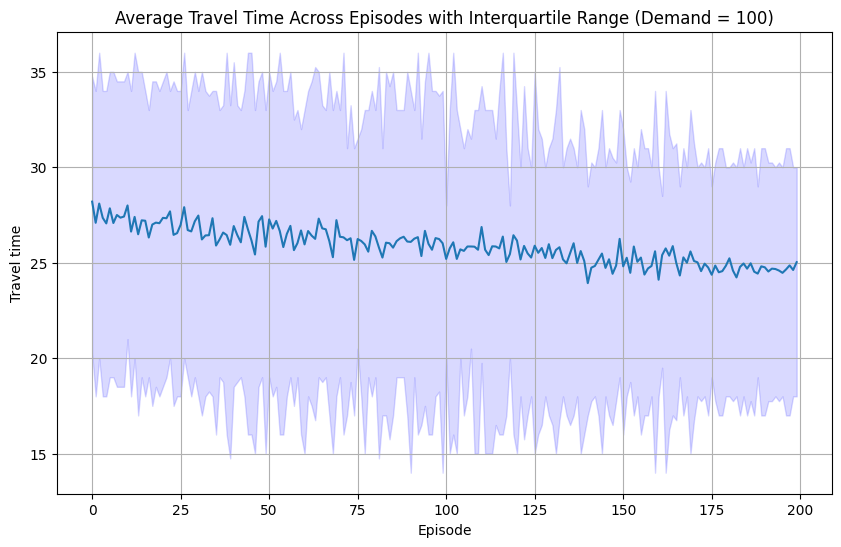

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
x = range(len(df))
ax.plot(x, df_stat['avg'])
# ax.plot(x, df_stat['md'])
ax.fill_between(
    x, df_stat['1stQ'], df_stat['3rdQ'], color='b', alpha=.15)

ax.set_title('Average Travel Time Across Episodes with Interquartile Range (Demand = 100)')
ax.grid()
plt.xlabel('Episode')
plt.ylabel('Travel time')
plt.savefig('AvgTT100.png')

In [16]:
# Load Reward Data

In [27]:
df_r_all = pd.read_csv('reward_scores_3.csv', index_col = 0)
df_r = df_r_all[300:]

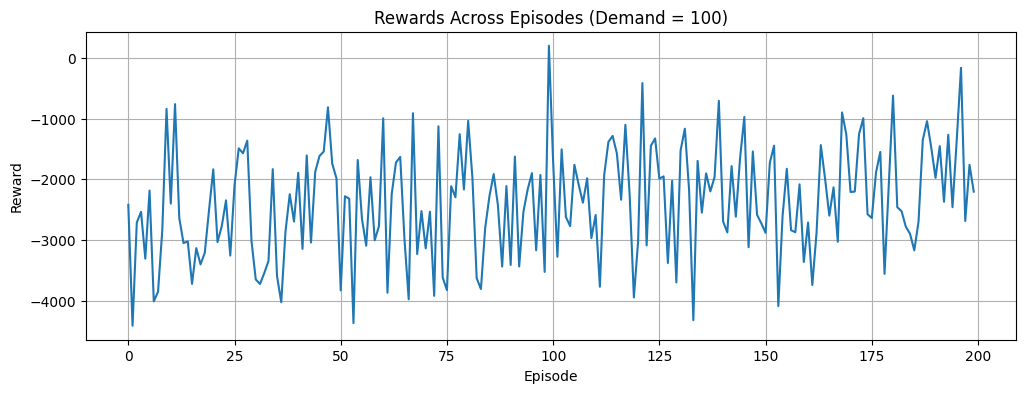

In [31]:
fig, ax = plt.subplots(figsize=(12,4))
x = range(len(df_r))
ax.plot(x, df_r['0'])
ax.set_title('Rewards Across Episodes (Demand = 100)')
ax.grid()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.savefig('Rewards100.png')

In [18]:
# Travel Times of Different ODs

In [5]:
df_12 = df.iloc[:, :25]
df_13 = df.iloc[:, 25:(25+19)]
df_42 = df.iloc[:, (25+19):(25+19+31)]
df_43 = df.iloc[:, (25+19+31)]

In [6]:
df_stat12 = pd.DataFrame()
df_stat12['avg'] = df_12.mean(axis = 1)
df_stat12['std'] = df_12.std(axis = 1)
df_stat12['CI'] = df_stat12['std'] * 1.96 / len(df_12.columns) 
df_stat12['upper'] = df_stat12['avg'] + df_stat12['CI']
df_stat12['lower'] = df_stat12['avg'] - df_stat12['CI']
df_stat12['min'] = df_12.min(axis = 1)
df_stat12['max'] = df_12.max(axis = 1)
df_stat12['md'] = df_12.median(axis = 1)
df_stat12['IQR'] = df_12.quantile(0.75, axis = 1) - df_12.quantile(0.25, axis = 1)
df_stat12['3rdQ'] = df_stat12['md'] + df_stat12['IQR']
df_stat12['1stQ'] = df_stat12['md'] - df_stat12['IQR']
# df_stat12.head()
df_stat13 = pd.DataFrame()
df_stat13['avg'] = df_13.mean(axis = 1)
df_stat13['std'] = df_13.std(axis = 1)
df_stat13['CI'] = df_stat13['std'] * 1.96 / len(df_13.columns)
df_stat13['upper'] = df_stat13['avg'] + df_stat13['CI']
df_stat13['lower'] = df_stat13['avg'] - df_stat13['CI']
df_stat13['min'] = df_13.min(axis = 1)
df_stat13['max'] = df_13.max(axis = 1)
# df_stat13.head()
df_stat42 = pd.DataFrame()
df_stat42['avg'] = df_42.mean(axis = 1)
df_stat42['std'] = df_42.std(axis = 1)
df_stat42['CI'] = df_stat42['std'] * 1.96 / len(df_42.columns)
df_stat42['upper'] = df_stat42['avg'] + df_stat42['CI']
df_stat42['lower'] = df_stat42['avg'] - df_stat42['CI']
df_stat42['min'] = df_42.min(axis = 1)
df_stat42['max'] = df_42.max(axis = 1)
# df_stat42.head()
df_stat43 = pd.DataFrame()
df_stat43['avg'] = df_43.mean(axis = 1)
df_stat43['std'] = df_43.std(axis = 1)
df_stat43['CI'] = df_stat43['std'] * 1.96 / len(df_43.columns)
df_stat43['upper'] = df_stat43['avg'] + df_stat43['CI']
df_stat43['lower'] = df_stat43['avg'] - df_stat43['CI']
df_stat43['min'] = df_43.min(axis = 1)
df_stat43['max'] = df_43.max(axis = 1)
# df_stat43.head()

ValueError: No axis named 1 for object type Series

In [ ]:
figure, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (15,8)) 

x = range(len(df))

axis[0, 0].plot(x, df_stat12['avg'])
axis[0, 0].fill_between(
    x, df_stat12['1stQ'], df_stat12['3rdQ'], color='b', alpha=.15)
axis[0, 0].set_title('Origin: 1, Destination: 2')

axis[0, 1].plot(x, df_stat13['avg'])
axis[0, 1].set_title('Origin: 1, Destination: 3')

axis[1, 0].plot(x, df_stat42['avg'])
axis[1, 0].set_title('Origin: 4, Destination: 2')

axis[1, 1].plot(x, df_stat43['avg'])
axis[1, 1].set_title('Origin: 4, Destination: 3')